# Random Seed Setup

In [1]:
import random
random.seed(11244306)

# Data Pre-processing

In [2]:
# import data
import numpy as np
import pandas as pd
df = pd.read_csv('musicData.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50005 entries, 0 to 50004
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instance_id       50000 non-null  float64
 1   artist_name       50000 non-null  object 
 2   track_name        50000 non-null  object 
 3   popularity        50000 non-null  float64
 4   acousticness      50000 non-null  float64
 5   danceability      50000 non-null  float64
 6   duration_ms       50000 non-null  float64
 7   energy            50000 non-null  float64
 8   instrumentalness  50000 non-null  float64
 9   key               50000 non-null  object 
 10  liveness          50000 non-null  float64
 11  loudness          50000 non-null  float64
 12  mode              50000 non-null  object 
 13  speechiness       50000 non-null  float64
 14  tempo             50000 non-null  object 
 15  obtained_date     50000 non-null  object 
 16  valence           50000 non-null  float6

In [3]:
# drop 5 rows without instance_id
df.dropna(subset=['instance_id'], inplace=True)

In [4]:
# check missing values in duration
df['duration_ms'].value_counts()

-1.0         4939
 240000.0      33
 192000.0      32
 180000.0      28
 216000.0      20
             ... 
 154574.0       1
 359213.0       1
 656213.0       1
 506320.0       1
 189483.0       1
Name: duration_ms, Length: 26028, dtype: int64

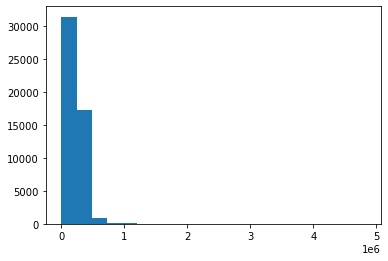

In [5]:
# draw distribution of duration
import matplotlib.pyplot as plt
plt.hist(df['duration_ms'], bins=20)
plt.show()

In [6]:
# replace -1 as nan
df['duration_ms'].replace(-1.0, np.nan, inplace=True)

# fillna with median value (mean value is likely to be influenced by outliers)
duration_median = df['duration_ms'].median()
df['duration_ms'].fillna(duration_median, inplace=True)

In [7]:
# check all the unique values of key
df['key'].unique()

array(['A#', 'D', 'G#', 'C#', 'F#', 'B', 'G', 'F', 'A', 'C', 'E', 'D#'],
      dtype=object)

In [8]:
# one-hot encoding for key
df = pd.get_dummies(df, columns=['key'])

In [9]:
# check all the unique values of mode
df['mode'].unique()

array(['Minor', 'Major'], dtype=object)

In [10]:
# one-hot encoding for mode
df = pd.get_dummies(df, columns=['mode'])

In [11]:
# check ? values in tempo
df['tempo'].value_counts()

?                     4980
140.007                 17
120.0                   17
100.00299999999999      16
100.014                 15
                      ... 
137.046                  1
136.378                  1
93.041                   1
113.98200000000001       1
99.20100000000001        1
Name: tempo, Length: 29394, dtype: int64

In [12]:
# replace ? with 0
df['tempo'].replace('?', 0, inplace=True)

# convert data type to float
df['tempo'] = df['tempo'].astype(float)

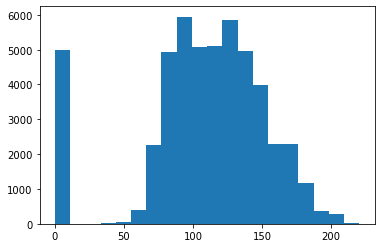

In [13]:
# draw distribution of duration
plt.hist(df['tempo'], bins=20)
plt.show()

In [14]:
# replace 0 as nan
df['tempo'].replace(0, np.nan, inplace=True)

# fillna with mean value
tempo_mean = df['tempo'].mean()
df['tempo'].fillna(tempo_mean, inplace=True)

In [15]:
# check all the unique values of obtained_date
df['obtained_date'].unique()

array(['4-Apr', '3-Apr', '5-Apr', '1-Apr', '0/4'], dtype=object)

In [16]:
# check all the unique values of genre
df['music_genre'].unique()

array(['Electronic', 'Anime', 'Jazz', 'Alternative', 'Country', 'Rap',
       'Blues', 'Rock', 'Classical', 'Hip-Hop'], dtype=object)

In [17]:
# Define a dictionary to map key to numerical values
genre_mapping = {'Electronic': 0, 'Anime': 1, 'Jazz': 2, 'Alternative': 3, 'Country': 4, 'Rap': 5, 
              'Blues': 6, 'Rock': 7, 'Classical': 8, 'Hip-Hop': 9}

df['music_genre'] = df['music_genre'].replace(genre_mapping)

In [18]:
# drop columns that will not be fed to model
df.drop(['instance_id', 'artist_name', 'track_name', 'obtained_date', 'key_G#', 'mode_Minor'], axis=1, inplace=True)

In [19]:
# normalize numerical columns with standard scaler
from sklearn.preprocessing import StandardScaler
columns_to_scale = df.columns[0:11]

scaler = StandardScaler()
df.loc[:, columns_to_scale] = scaler.fit_transform(df.loc[:, columns_to_scale])

In [20]:
df.head()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,...,key_B,key_C,key_C#,key_D,key_D#,key_E,key_F,key_F#,key_G,mode_Major
0,-1.108003,-0.883886,0.524878,-0.154369,1.289876,1.875809,-0.488113,0.638132,-0.185322,-0.655673,...,0,0,0,0,0,0,0,0,0,0
1,-0.850633,-0.860390,0.356933,-0.239968,1.097101,2.361357,-0.432433,0.339248,-0.627258,-0.170280,...,0,0,0,1,0,0,0,0,0,0
2,-1.043661,-0.888632,0.345737,-0.265269,0.586813,-0.521812,2.104140,0.732892,-0.582867,0.276558,...,0,0,0,0,0,0,0,0,0,1
3,-0.657606,-0.823184,1.207853,-0.725393,0.378918,-0.550300,-0.228269,0.752201,1.434452,0.277246,...,0,0,1,0,0,0,0,0,0,1
4,-0.786291,-0.883974,0.446504,-0.201488,-0.048212,2.235361,-0.228269,0.465324,-0.515787,0.862689,...,0,0,0,0,0,0,0,1,0,1


# Train-test split

In [21]:
# Shuffle the dataset
df_shuffled = df.sample(frac=1)

# Initialize empty lists to store train and test data
train_data = []
test_data = []

# Iterate over each genre
for genre in range(10):
    # Get all songs of the current genre
    genre_songs = df_shuffled[df_shuffled['music_genre'] == genre]
    
    # Select 500 random songs for the test set
    test_songs = genre_songs.sample(n=500)
    
    # Select the remaining songs for the training set
    train_songs = genre_songs.drop(test_songs.index)
    
    # Append the songs to the train and test data lists
    train_data.append(train_songs)
    test_data.append(test_songs)

# Concatenate the train and test data into DataFrames
train_df = pd.concat(train_data)
test_df = pd.concat(test_data)

# Reset the index of the train and test DataFrames
train_df.reset_index(drop=True, inplace=True)
test_df.reset_index(drop=True, inplace=True)

In [22]:
train_df['music_genre'].value_counts()

0    4500
1    4500
2    4500
3    4500
4    4500
5    4500
6    4500
7    4500
8    4500
9    4500
Name: music_genre, dtype: int64

In [23]:
test_df['music_genre'].value_counts()

0    500
1    500
2    500
3    500
4    500
5    500
6    500
7    500
8    500
9    500
Name: music_genre, dtype: int64

In [24]:
# assign X and y
X_train = train_df.drop('music_genre', axis=1)
y_train = train_df['music_genre']
X_test = test_df.drop('music_genre', axis=1)
y_test = test_df['music_genre']

# Dimension Reduction and Clustering

In [25]:
# perform PCA
from sklearn.decomposition import PCA
pca = PCA()

# for X_train
pca.fit(X_train)
X_train_reduced = pca.transform(X_train)[:, :3]

# for X_test
pca.fit(X_test)
X_test_reduced = pca.transform(X_test)[:, :3]

combined_df_reduced = np.concatenate((X_train_reduced, X_test_reduced), axis=0)

In [26]:
# fit k-means with 10 clusters
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10)
labels = kmeans.fit_predict(combined_df_reduced)

C:\users\lucaw\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


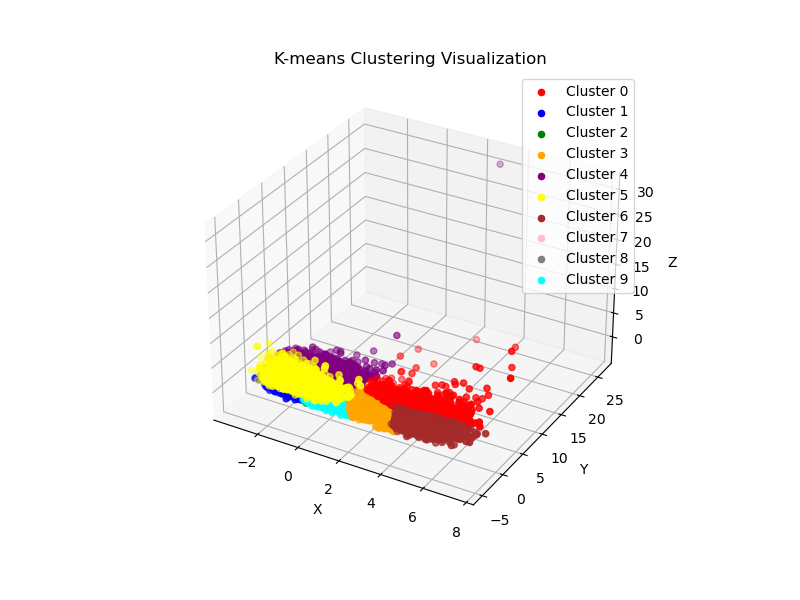

In [27]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib widget

# Create a 3D scatter plot with different colors for each cluster
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Assign colors for each cluster
colors = ['red', 'blue', 'green', 'orange', 'purple', 'yellow', 'brown', 'pink', 'gray', 'cyan']

# Iterate through each cluster label and plot the corresponding points
for label in range(10):
    cluster_points = combined_df_reduced[labels == label]
    ax.scatter(cluster_points[:, 0], cluster_points[:, 1], cluster_points[:, 2], color=colors[label], label=f'Cluster {label}')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('K-means Clustering Visualization')
plt.legend()
plt.show()

# Logistic Regression

Average AUC: 0.9102376


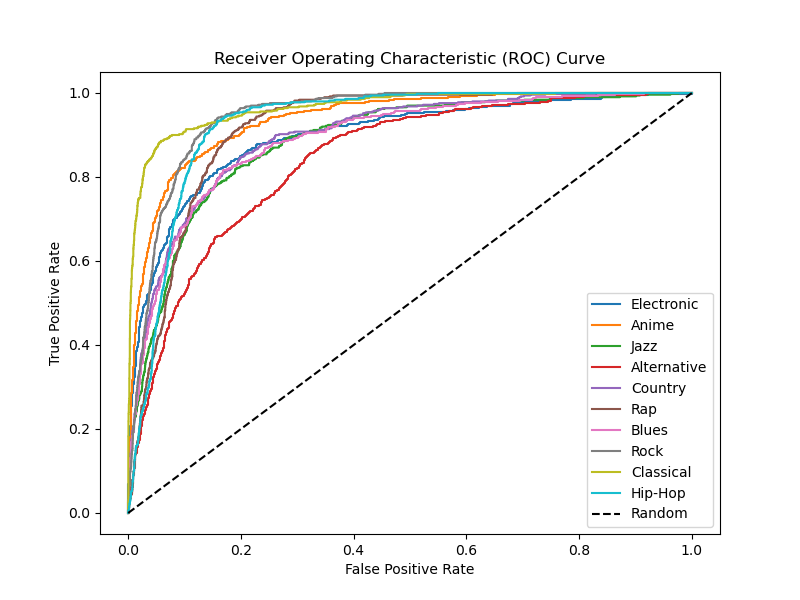

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve

# Create and fit the logistic regression model with original dataset
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict probabilities for the test set
y_pred_prob = model.predict_proba(X_test)

# Calculate AUC scores for each class
auc_scores = []
for i in range(len(model.classes_)):
    auc = roc_auc_score((y_test == i).astype(int), y_pred_prob[:, i])
    auc_scores.append(auc)

# Calculate average AUC score
average_auc = np.mean(auc_scores)
print('Average AUC:', average_auc)

genre_list = ['Electronic', 'Anime', 'Jazz', 'Alternative', 'Country', 'Rap', 
              'Blues', 'Rock', 'Classical', 'Hip-Hop']

# Plot ROC curves for each class
plt.figure(figsize=(8, 6))
for i in range(len(model.classes_)):
    fpr, tpr, _ = roc_curve((y_test == i).astype(int), y_pred_prob[:, i])
    plt.plot(fpr, tpr, label=genre_list[i])

plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

Average AUC: 0.7970624444444445


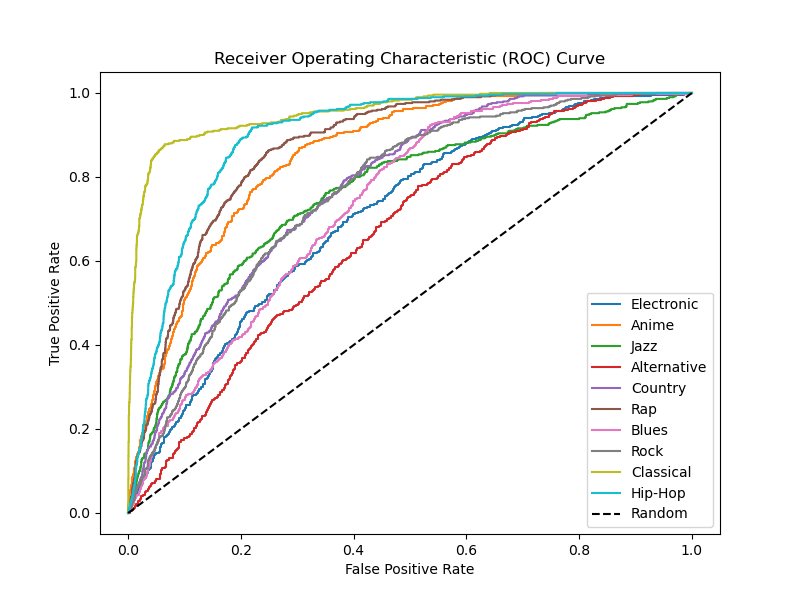

In [29]:
# Create and fit the logistic regression model with reduced dataset
model = LogisticRegression(max_iter=1000)
model.fit(X_train_reduced, y_train)

# Predict probabilities for the test set
y_pred_prob = model.predict_proba(X_test_reduced)

# Calculate AUC scores for each class
auc_scores = []
for i in range(len(model.classes_)):
    auc = roc_auc_score((y_test == i).astype(int), y_pred_prob[:, i])
    auc_scores.append(auc)

# Calculate average AUC score
average_auc = np.mean(auc_scores)
print('Average AUC:', average_auc)

genre_list = ['Electronic', 'Anime', 'Jazz', 'Alternative', 'Country', 'Rap', 
              'Blues', 'Rock', 'Classical', 'Hip-Hop']

# Plot ROC curves for each class
plt.figure(figsize=(8, 6))
for i in range(len(model.classes_)):
    fpr, tpr, _ = roc_curve((y_test == i).astype(int), y_pred_prob[:, i])
    plt.plot(fpr, tpr, label=genre_list[i])

plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# NN

In [30]:
import torch
import torch.nn as nn
import torch.optim as optim

class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

In [31]:
def train(model, criterion, optimizer, X_train, y_train):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()
    return loss.item()

In [32]:
def evaluate(model, X_eval):
    model.eval()
    with torch.no_grad():
        outputs = model(X_eval)
        _, predicted = torch.max(outputs.data, 1)
    return predicted

In [33]:
input_size = X_train.shape[1]
hidden_size = 128
num_classes = 10

model = NeuralNet(input_size, hidden_size, num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [34]:
X_train = torch.tensor(X_train.values, dtype=torch.float32)
X_test = torch.tensor(X_test.values, dtype=torch.float32)
y_train = torch.tensor(y_train.values, dtype=torch.long)
y_test = torch.tensor(y_test.values, dtype=torch.long)

In [35]:
num_epochs = 20
batch_size = 32

for epoch in range(num_epochs):
    total_loss = 0
    for i in range(0, len(X_train), batch_size):
        batch_X = X_train[i:i+batch_size]
        batch_y = y_train[i:i+batch_size]
        loss = train(model, criterion, optimizer, batch_X, batch_y)
        total_loss += loss
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {total_loss}")

Epoch 1/20, Loss: 1962.6752663301304
Epoch 2/20, Loss: 1175.529672758188
Epoch 3/20, Loss: 896.3321933667175
Epoch 4/20, Loss: 824.84160572174
Epoch 5/20, Loss: 835.3365373563138
Epoch 6/20, Loss: 857.2113791884622
Epoch 7/20, Loss: 831.3493318198598
Epoch 8/20, Loss: 851.5937170934048
Epoch 9/20, Loss: 887.4047822895809
Epoch 10/20, Loss: 836.733211512852
Epoch 11/20, Loss: 784.7446637673129
Epoch 12/20, Loss: 788.5973532765784
Epoch 13/20, Loss: 807.8592187303002
Epoch 14/20, Loss: 822.6586685687653
Epoch 15/20, Loss: 818.4829919732874
Epoch 16/20, Loss: 820.0070518048306
Epoch 17/20, Loss: 788.8392186460551
Epoch 18/20, Loss: 830.012191569258
Epoch 19/20, Loss: 828.7034926359484
Epoch 20/20, Loss: 875.9420584808104


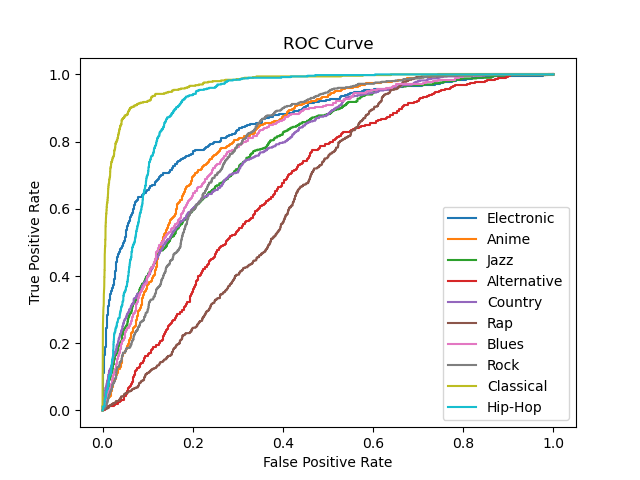

AUC: 0.8075116444444446


In [36]:
predicted = evaluate(model, X_test)
probabilities = nn.Softmax(dim=1)(model(X_test))
auc = roc_auc_score(y_test, probabilities.detach().numpy(), multi_class='ovr')

fpr = {}
tpr = {}
thresholds = {}

for i in range(num_classes):
    fpr[i], tpr[i], thresholds[i] = roc_curve(y_test, probabilities.detach().numpy()[:, i], pos_label=i)

plt.figure()
for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], label=genre_list[i])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

print(f"AUC: {auc}")